<a href="https://colab.research.google.com/github/M-PRERNA/MACHINE-LEARNING/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values  #we add a [] to list all the columns we need
#since we want to plot the clusters in 2-D 
# hence we make use of the last two columns in our matrix of features
# Y = dataset.iloc[:,-1].values , as we do not have any dependant variable as a
# priory in clustering models

## Using the elbow method to find the optimal number of clusters

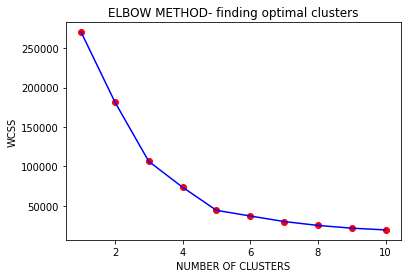

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.scatter(range(1,11),wcss,color='red')
plt.plot(range(1,11),wcss,color='blue')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD- finding optimal clusters')
plt.show()

the optimal number of clusters is 5

## Training the K-Means model on the dataset

In [8]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 42)
y_kmeans_pred = kmeans.fit_predict(X) #the fit_predict method returns the dependant variable which we want to create 
# and Compute cluster centers and predict cluster index for each sample.

In [9]:
y_kmeans_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

## Visualising the clusters

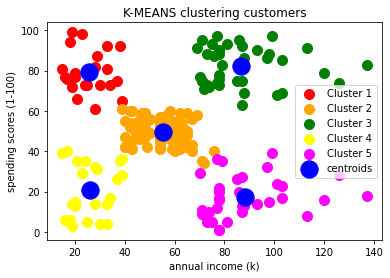

In [17]:
# X[y_kmeans_pred==0,0] ~ the annual income column where kmeans equals 0, 
# and it is the first column of our X, hence we put zero in place of column
plt.scatter(X[y_kmeans_pred==0,0],X[y_kmeans_pred==0,1],s=100,c='red',label = 'Cluster 1')
plt.scatter(X[y_kmeans_pred==1,0],X[y_kmeans_pred==1,1],s=100,c='orange',label = 'Cluster 2')
plt.scatter(X[y_kmeans_pred==2,0],X[y_kmeans_pred==2,1],s=100,c='green',label = 'Cluster 3')
plt.scatter(X[y_kmeans_pred==3,0],X[y_kmeans_pred==3,1],s=100,c='yellow',label = 'Cluster 4')
plt.scatter(X[y_kmeans_pred==4,0],X[y_kmeans_pred==4,1],s=100,c='magenta',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue',label="centroids")
plt.title('K-MEANS clustering customers')
plt.xlabel('annual income (k)')
plt.ylabel('spending scores (1-100)')
plt.legend()
plt.show()